In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('housing.csv')
housing.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [4]:
#housing["PTRATIO"].value_counts()

In [5]:
housing.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [6]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'LSTAT'}>],
       [<AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'MEDV'}>]], dtype=object)

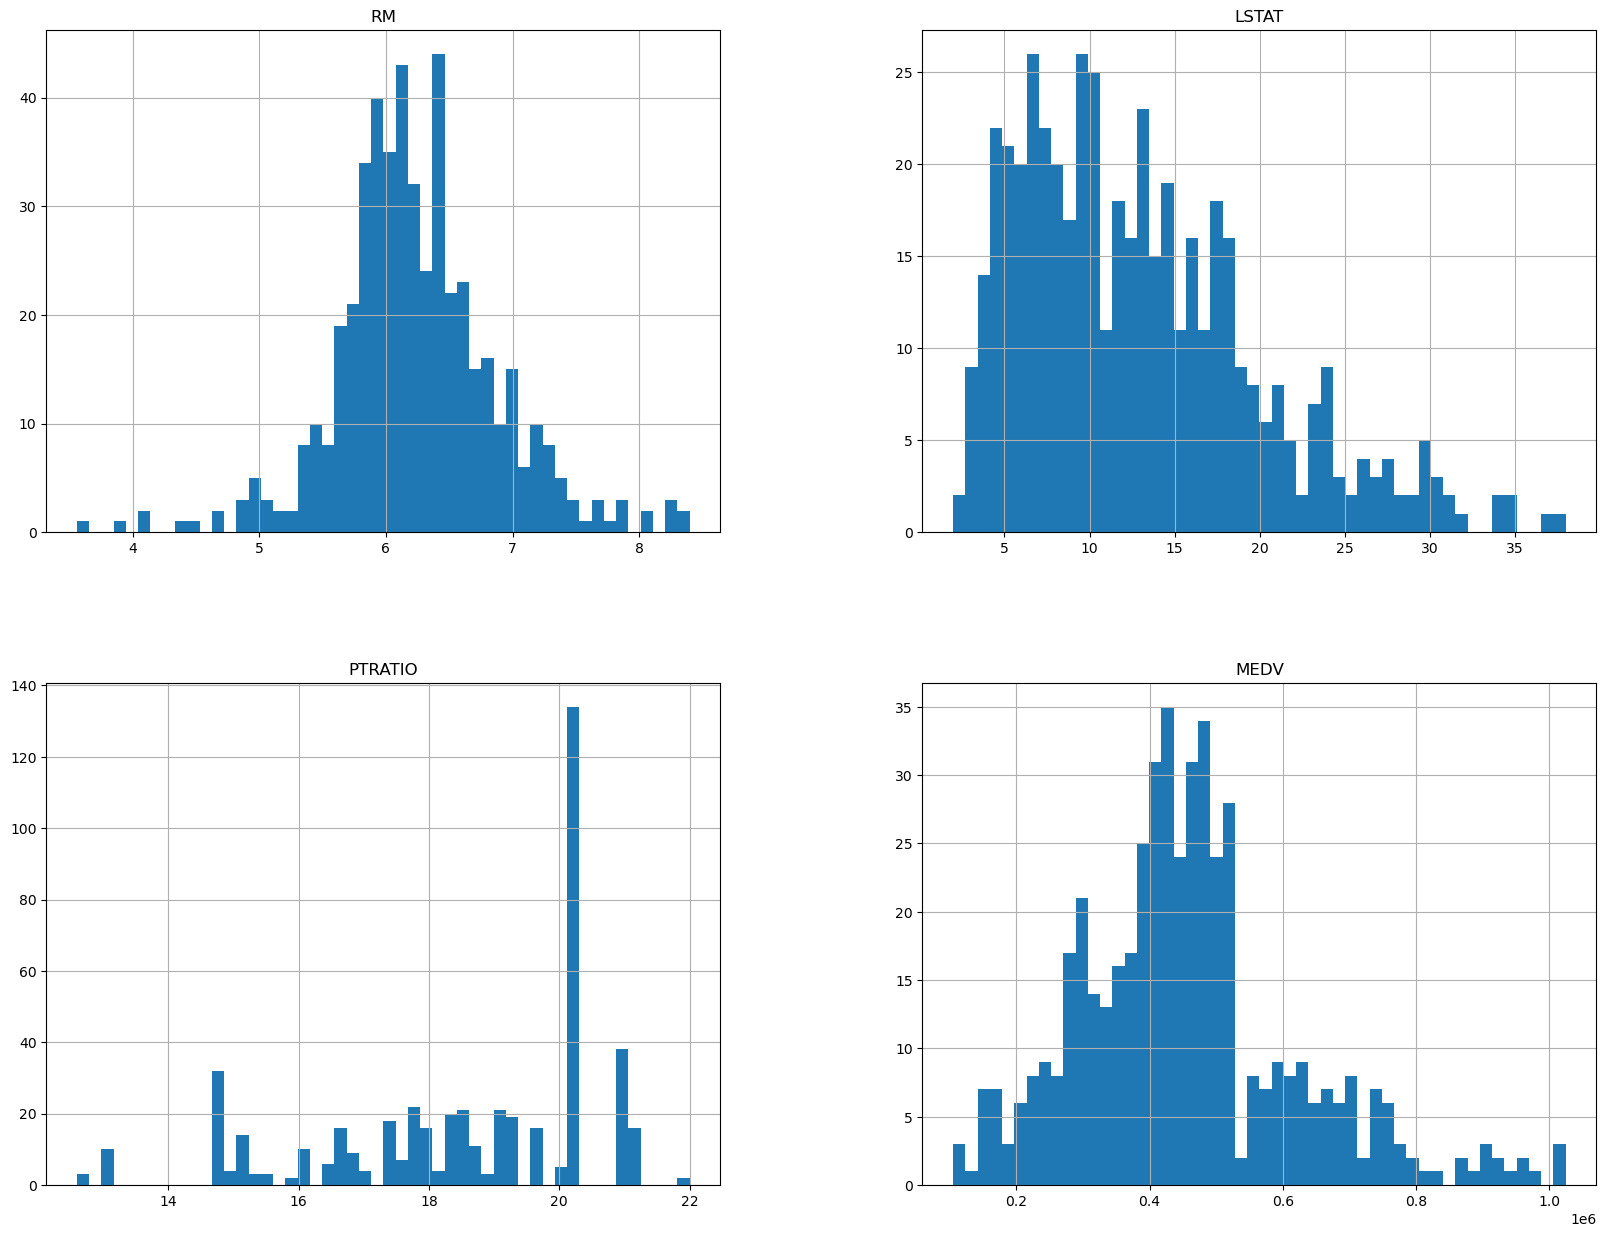

In [7]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))

## Train Test splitting

In [8]:
# import numpy as np
# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled =np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[ : test_set_size]
#     train_indices = shuffled[test_set_size : ]
#     return data.iloc[train_indices], data.iloc[test_indices]
    

In [9]:
#train_set, test_set = split_train_test(housing, 0.2)

In [10]:
#print(len(train_set))

In [11]:
#print(f"Rows in train set: {len(train_set)}\nRows in tet set:{len(test_set)}")

In [12]:
#using sklearn for train and test splitting
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in tet set:{len(test_set)}")

Rows in train set: 391
Rows in tet set:98


In [13]:
housing=train_set.copy()

## Corelation mAtrix

In [14]:
corr_matrix = housing.corr()

In [15]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.706019
PTRATIO   -0.528776
LSTAT     -0.758349
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='PTRATIO'>,
        <AxesSubplot:xlabel='RM', ylabel='PTRATIO'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='PTRATIO'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='PTRATIO'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

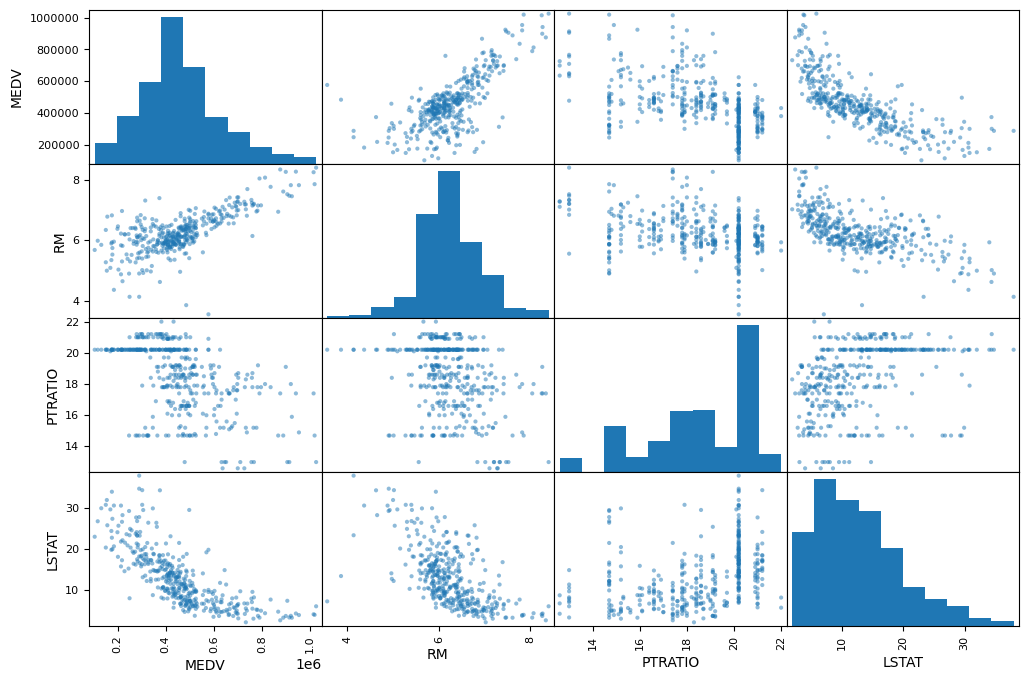

In [16]:
from pandas.plotting import scatter_matrix
attributes =['MEDV', 'RM', 'PTRATIO', 'LSTAT']
scatter_matrix(housing[attributes], figsize =(12,8))

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [18]:
imputer.statistics_

array([6.195e+00, 1.141e+01, 1.890e+01, 4.452e+05])

In [19]:
housing.describe()

,RM,LSTAT,PTRATIO,MEDV
count,391.000000,391.000000,391.000000,3.910000e+02
mean,6.257668,12.836598,18.441432,4.617583e+05
std,0.674118,7.127752,2.181947,1.685501e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.886000,7.195000,17.000000,3.559500e+05
50%,6.195000,11.410000,18.900000,4.452000e+05
75%,6.630000,16.920000,20.200000,5.250000e+05
max,8.398000,37.970000,22.000000,1.024800e+06
